# Exploring the Partridge Library
The Partridge library (https://github.com/remix/partridge) is for working with for working with GTFS feeds using pandas DataFrames. PearTree uses Partridge as a dependency.
### questions to answer:
- how many times is each stop served in a day? Can we plot per stop?
- how many times do the trips run each day?
- how many stops does each trip have?
- how many trips does each route have?

In [47]:
import networkx as nx
import numpy as np
import pandas as pd
import partridge as ptg

In [48]:
import os, sys

In [49]:
sys.path.append(r"C:\repos\peartree")
import peartree as pt

In [50]:
path = 'input_folder/cap_haitien_gtfs.zip'

# Inspect how many services there are

In [51]:
# Extract service ids and then trip counts by those dates
try:
    service_ids_by_date = ptg.read_service_ids_by_date(path)
    trip_counts_by_date = ptg.read_trip_counts_by_date(path)

# Raised by partridge if no valid dates returned
except AssertionError:
    # Make sure we have some valid values returned in trips
    raise InvalidGTFS('No valid trip counts by date '
                      'were identified in GTFS.')

In [52]:
#service_ids_by_date

I can tell there are two services. Also manually opening the gtfs calendar txt file, I can tell that service one is one the weekend and that service 2 is on the weekdays. so we should probably run two different analysis.

In [53]:
#trip_counts_by_date

Looking at the trip counts, service 1 always has 29 trips, and service 2 always has 74 trips

In [54]:
# Choose the service id that has the most trips associated with it
# In the case of dictionaries, max() returns the largest key. Let's use the key parameter so that we can find the dictionary's key having the largest value.
selected_date, trip_count = max(trip_counts_by_date.items(), key=lambda p: p[1])

In [55]:
selected_date

datetime.date(2019, 7, 15)

In [56]:
trip_count

74

In [57]:
print('Selected_date: {}'.format(selected_date))
print('Number of trips on that date: {}'.format(trip_count))

all_service_ids = '\n\t'.join(service_ids_by_date[selected_date])
print('\nAll related service IDs: \n\t{}'.format(all_service_ids))

sub = service_ids_by_date[selected_date]
feed_query = {'trips.txt': {'service_id': sub}}

Selected_date: 2019-07-15
Number of trips on that date: 74

All related service IDs: 
	service_0002


In [58]:
sub

frozenset({'service_0002'})

In [59]:
feed_query

{'trips.txt': {'service_id': frozenset({'service_0002'})}}

## Sample date for service 1, on weekends

In [60]:
# from: http://simplistic.me/playing-with-gtfs.html
import datetime

service_ids_by_date = ptg.read_service_ids_by_date(path)
service_ids = service_ids_by_date[datetime.date(2019, 6, 29)]

print(f"service_ids is {service_ids}")

# view lets you filter before you load the feed. For example, below you are filtering by the service_ids
feed = ptg.load_feed(path, view={
    'trips.txt': {
        'service_id': service_ids,
    },
})

service_ids is frozenset({'service_0001'})


In [61]:
[x for x in dir(feed) if not x.startswith('__')]

['_bootstrap',
 '_cache',
 '_config',
 '_convert_types',
 '_delete_after_reading',
 '_filter',
 '_locks',
 '_pathmap',
 '_prune',
 '_read',
 '_read_csv',
 '_shared_lock',
 '_transform',
 '_view',
 'agency',
 'calendar',
 'calendar_dates',
 'fare_attributes',
 'fare_rules',
 'feed_info',
 'frequencies',
 'get',
 'routes',
 'set',
 'shapes',
 'stop_times',
 'stops',
 'transfers',
 'trips']

### GTFS Routes and Trips
GTFS Routes are equivalent to "Lines" in public transportation systems. Routes are defined in the file routes.txt, and are made up of one or more Trips - remember that a Trip occurs at a specific time and so a Route is time independent.

In [62]:
feed.routes

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,route_0002,taptaps_01,NaN,Barrière Bouteille - Grison Garde,NaN,1501,NaN,C90437,FFFFFF
1,route_0003,taptaps_01,NaN,Rue 5A - Milot,NaN,1501,NaN,C90441,FFFFFF
2,route_0004,taptaps_01,NaN,Rue 5A - Trou Du Nord,NaN,1501,NaN,C90411,FFFFFF
3,route_0006,taptaps_01,NaN,Rue 5A - Madeline,NaN,1501,NaN,0456C9,FFFFFF
4,route_0008,taptaps_01,NaN,Rue 0L - Champin,NaN,1501,NaN,04C934,000000
5,route_0010,taptaps_01,NaN,Pont Neuf - Ouanaminthe,NaN,1501,NaN,04C9B7,000000
6,route_0015,taptaps_01,NaN,Rue 0L - Morne Rouge,NaN,1501,NaN,C904A5,FFFFFF
7,route_0017,taptaps_01,NaN,Barrière Bouteille - Limbé,NaN,1501,NaN,0434C9,FFFFFF
8,route_0018,taptaps_01,NaN,Rue 5A - Limonade,NaN,1501,NaN,04C9C7,000000
9,route_0019,taptaps_01,NaN,Champ De Mars - Labadie,Delay at Du Croix,1501,NaN,C904C9,FFFFFF


In [63]:
feed.trips

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible
0,trip_0004,route_0021,service_0001,Rue 0L,NaN,NaN,NaN,shape_0001,NaN
1,trip_0006,route_0002,service_0001,Grison Garde,NaN,NaN,NaN,shape_0002,NaN
2,trip_0010,route_0003,service_0001,Milot,NaN,NaN,NaN,shape_0003,NaN
3,trip_0014,route_0004,service_0001,Station Trou Du Nord,NaN,NaN,NaN,shape_0004,NaN
4,trip_0018,route_0003,service_0001,Pont Neuf 1,NaN,NaN,NaN,shape_0005,NaN
5,trip_0022,route_0006,service_0001,Madeline,NaN,NaN,NaN,shape_0006,NaN
6,trip_0024,route_0002,service_0001,Barrière Bouteille,NaN,NaN,NaN,shape_0007,NaN
7,trip_0028,route_0008,service_0001,Champin,NaN,NaN,NaN,shape_0008,NaN
8,trip_0030,route_0015,service_0001,Rue 0L,NaN,NaN,NaN,shape_0009,NaN
9,trip_0032,route_0010,service_0001,Ouanaminthe,NaN,NaN,NaN,shape_0010,NaN


In [64]:
s = feed.stops
s.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,stop_0001,NaN,Bonnay Dugal 1,NaN,19.704813,-72.180840,NaN,NaN,0,NaN,NaN,NaN
1,stop_0002,NaN,Cité du Peuple,NaN,19.744087,-72.212227,NaN,NaN,0,NaN,NaN,NaN
2,stop_0003,NaN,Cité Lescot,NaN,19.752174,-72.206665,NaN,NaN,0,NaN,NaN,NaN
3,stop_0004,NaN,Dubreuil,NaN,19.613947,-72.203201,NaN,NaN,0,NaN,NaN,NaN
4,stop_0005,NaN,Pipo-Ville,NaN,19.722265,-72.241341,NaN,NaN,0,NaN,NaN,NaN


In [65]:
len(s)

261

In [66]:
s_time = feed.stop_times
s_time.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,trip_0004,41272.0,41272.0,stop_0032,1,NaN,NaN,NaN,NaN
1,trip_0004,41414.0,41414.0,stop_0072,2,NaN,NaN,NaN,NaN
2,trip_0004,41503.0,41503.0,stop_0238,3,NaN,NaN,NaN,NaN
3,trip_0004,41543.0,41543.0,stop_0229,4,NaN,NaN,NaN,NaN
4,trip_0004,41582.0,41582.0,stop_0038,5,NaN,NaN,NaN,NaN


In [67]:
len(s_time)

450

In [68]:
# convert seconds to hours, minutes and seconds

In [69]:
# merge
f = (feed.stop_times[['trip_id', 'arrival_time', 'stop_id']]
     .merge(s[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], on='stop_id')
    )
#f.head()

In [70]:
f["arrival_time2"] = f["arrival_time"].apply(lambda x: str(datetime.timedelta(seconds=x)))

In [71]:
f.sort_values("trip_id")[:10]

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
0,trip_0004,41272.0,stop_0032,Zo Vincent,19.730322,-72.226074,11:27:52
35,trip_0004,42018.0,stop_0100,Barrière Bouteille,19.747734,-72.207550,11:40:18
43,trip_0004,42215.0,stop_0081,Cite Lescot,19.751564,-72.206818,11:43:35
32,trip_0004,41916.0,stop_0056,Hôtel Congo,19.745630,-72.209053,11:38:36
30,trip_0004,41895.0,stop_0114,Sainte Philomène,19.744984,-72.210075,11:38:15
29,trip_0004,41801.0,stop_0204,Cité du Peuple 1,19.743656,-72.212990,11:36:41
46,trip_0004,42267.0,stop_0194,Rue 0L,19.753225,-72.206207,11:44:27
25,trip_0004,41762.0,stop_0020,Cité du Peuple,19.742886,-72.214500,11:36:02
23,trip_0004,41746.0,stop_0102,Fondation 1,19.742300,-72.215569,11:35:46
22,trip_0004,41720.0,stop_0251,Fondation,19.741301,-72.217255,11:35:20


In [72]:
f.shape[0]

450

In [73]:
f.arrival_time = pd.to_datetime(f.arrival_time, unit='s')

In [74]:
f

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
0,trip_0004,1970-01-01 11:27:52,stop_0032,Zo Vincent,19.730322,-72.226074,11:27:52
1,trip_0004,1970-01-01 11:30:14,stop_0072,Charrier 1,19.732510,-72.224388,11:30:14
2,trip_0094,1970-01-01 11:30:47,stop_0072,Charrier 1,19.732510,-72.224388,11:30:47
3,trip_0004,1970-01-01 11:31:43,stop_0238,Station Esso,19.734182,-72.221748,11:31:43
4,trip_0024,1970-01-01 14:12:13,stop_0238,Station Esso,19.734182,-72.221748,14:12:13
...,...,...,...,...,...,...,...
445,trip_0102,1970-01-01 11:09:35,stop_0225,Haut Du Croix,19.780752,-72.217453,11:09:35
446,trip_0102,1970-01-01 11:12:02,stop_0233,Fort Bougeois,19.773886,-72.211227,11:12:02
447,trip_0102,1970-01-01 11:16:19,stop_0249,Rue Cimetière Juif,19.766563,-72.207611,11:16:19
448,trip_0102,1970-01-01 11:17:13,stop_0221,Calvaire Ban Du Nord,19.764235,-72.205688,11:17:13


## Make a chart from the arrival time

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5) # set default size of plots

sns.set_style("white")
sns.set_context("talk")
sns.set_palette('Set2', 10)

In [76]:
# resample dataframe arrival time to 5 min bins (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)
f_1T = f.set_index(['arrival_time']).resample('5T')

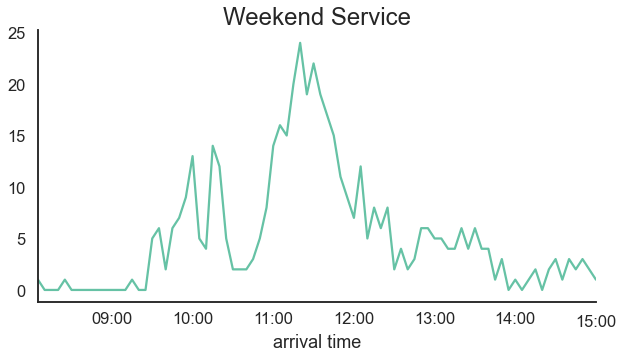

In [77]:
# https://datavizpyr.com/change-axis-labels-set-title-and-figure-size-to-plots-with-seaborn/
f_1T.size().plot()
plt.xlabel("arrival time")
plt.title("Weekend Service", size=24)
# despine() is a function that removes the spines from the right and upper portion of the plot by default
sns.despine()

## Inspecting some trips
From feed.trips I can see that there are two trips that use route_0002: trip_0006 and trip_0024. Below I am filtering the stops that make up these trips and I can tell that trip_0006 starts at stop_0143 and ends at stop_0250, while trip_0024 is the reverse. Also, trip_0006 runs in the morning, while trip_0024 runs in the afternoon.

In [78]:
f[f["trip_id"] == "trip_0006"]

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
39,trip_0006,1970-01-01 11:22:17,stop_0143,Barrière Bouteille,19.748932,-72.207581,11:22:17
49,trip_0006,1970-01-01 11:46:39,stop_0260,Morne Rouge,19.708532,-72.273491,11:46:39
51,trip_0006,1970-01-01 11:48:10,stop_0239,Rue Isabelle,19.702581,-72.271904,11:48:10
52,trip_0006,1970-01-01 12:02:20,stop_0088,Diadant,19.648520,-72.284912,12:02:20
53,trip_0006,1970-01-01 12:06:23,stop_0116,Diadant 2,19.645796,-72.288376,12:06:23
54,trip_0006,1970-01-01 12:08:05,stop_0010,Carrefour Dutty,19.642414,-72.292618,12:08:05
55,trip_0006,1970-01-01 12:18:16,stop_0250,Grison Garde,19.617008,-72.288849,12:18:16


In [79]:
f[f["trip_id"] == "trip_0024"]

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
4,trip_0024,1970-01-01 14:12:13,stop_0238,Station Esso,19.734182,-72.221748,14:12:13
10,trip_0024,1970-01-01 14:15:47,stop_0038,Le Sage Hôtel,19.737156,-72.220009,14:15:47
13,trip_0024,1970-01-01 14:17:09,stop_0024,Carrefour Nazareth Vertières,19.738056,-72.219612,14:17:09
40,trip_0024,1970-01-01 14:34:08,stop_0143,Barrière Bouteille,19.748932,-72.207581,14:34:08
56,trip_0024,1970-01-01 13:17:29,stop_0250,Grison Garde,19.617008,-72.288849,13:17:29
184,trip_0024,1970-01-01 14:01:46,stop_0228,Monbin Lataille,19.720430,-72.233688,14:01:46
185,trip_0024,1970-01-01 14:30:35,stop_0109,Sainte Philomène,19.744797,-72.210571,14:30:35


## sample date for service 2 on weekdays

In [80]:
# from: http://simplistic.me/playing-with-gtfs.html
import datetime

service_ids_by_date = ptg.read_service_ids_by_date(path)
service_ids = service_ids_by_date[datetime.date(2019, 10, 1)]

print(f"service_ids is {service_ids}")

feed2 = ptg.load_feed(path, view={
    'trips.txt': {
        'service_id': service_ids,
    },
})

service_ids is frozenset({'service_0002'})


In [81]:
len(feed2.stop_times)

1354

In [82]:
len(feed2.stops)

263

In [83]:
# merge
f2 = (feed2.stop_times[['trip_id', 'arrival_time', 'stop_id']]
     .merge(feed.stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], on='stop_id')
    )

In [84]:
#f["arrival_time2"] = f["arrival_time"].apply(lambda x: str(datetime.timedelta(seconds=x)))
f2.arrival_time = pd.to_datetime(f2.arrival_time, unit='s')

In [85]:
f2

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon
0,trip_0001,1970-01-01 07:37:44,stop_0032,Zo Vincent,19.730322,-72.226074
1,trip_0002,1970-01-01 11:27:52,stop_0032,Zo Vincent,19.730322,-72.226074
2,trip_0003,1970-01-01 15:01:09,stop_0032,Zo Vincent,19.730322,-72.226074
3,trip_0001,1970-01-01 07:40:33,stop_0072,Charrier 1,19.732510,-72.224388
4,trip_0002,1970-01-01 11:30:14,stop_0072,Charrier 1,19.732510,-72.224388
...,...,...,...,...,...,...
1345,trip_0100,1970-01-01 11:17:13,stop_0221,Calvaire Ban Du Nord,19.764235,-72.205688
1346,trip_0101,1970-01-01 15:31:15,stop_0221,Calvaire Ban Du Nord,19.764235,-72.205688
1347,trip_0099,1970-01-01 10:20:09,stop_0231,Champ De Mars,19.763449,-72.204720
1348,trip_0100,1970-01-01 11:18:01,stop_0231,Champ De Mars,19.763449,-72.204720


In [86]:
#f.loc[(f.stop_id == "stop_0052") | (f.stop_id == "stop_0132")].sort_values("arrival_time")

In [87]:
f2.sort_values("arrival_time")[:5]

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon
184,trip_0059,1970-01-01 07:07:33,stop_0132,Rue 5A,19.755535,-72.202240
192,trip_0059,1970-01-01 07:09:53,stop_0052,Rue 2A,19.754192,-72.203186
530,trip_0059,1970-01-01 07:10:29,stop_0207,Rue 0A,19.752293,-72.204178
181,trip_0019,1970-01-01 07:11:04,stop_0132,Rue 5A,19.755535,-72.202240
204,trip_0059,1970-01-01 07:11:11,stop_0046,Pont Neuf,19.750965,-72.204582


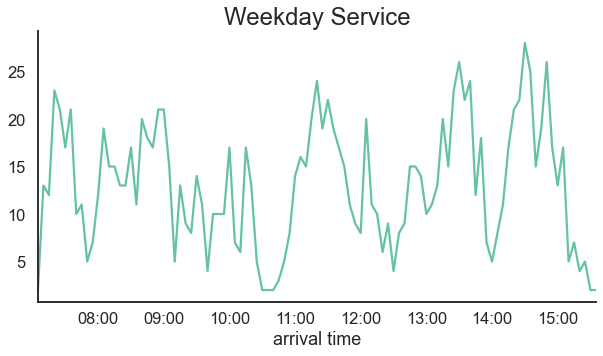

In [88]:
f_1T = f2.set_index(['arrival_time']).resample('5T')
f_1T.size().plot()
plt.xlabel("arrival time")
plt.title("Weekday Service", size=24)
sns.despine()